# Fig 4, Fig S2 Plotting

This notebook plots out the data associated with Figure 4 and Figure S2.

### Standard Imports

In [1]:
# standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import matplotlib as mpl
from cycler import cycler
import pylab
from matplotlib.colors import LogNorm, Normalize

# Plotting parameters
sns.set_context("talk", font_scale=1, rc={"lines.linewidth": 2.0, 'lines.markersize': 5})
sns.set_style("ticks")
sns.set_style({"xtick.direction": "in","ytick.direction": "in"})
mpl.rc('axes', prop_cycle=(cycler('color', ['r', 'k', 'b','g','y','m','c']) ))
mpl.rc('text', usetex=False)
tw = 1.5
sns.set_style({"xtick.major.size": 12, "ytick.major.size": 12,
               "xtick.minor.size": 8, "ytick.minor.size": 8,
               'axes.labelsize': 48,
               'xtick.major.width': tw, 'xtick.minor.width': tw,
               'ytick.major.width': tw, 'ytick.minor.width': tw})
mpl.rc('xtick', labelsize=24) 
mpl.rc('ytick', labelsize=24)
mpl.rc('axes', linewidth=1.75)
plt.gcf().subplots_adjust(bottom=0.15)
sns.set_style({'axes.labelsize': 48, 'axes.titlesize': 48})
cm = 1/2.54


# Color variables
cb_green = (102/255, 194/255, 165/255, 0.5)
cb_orange = (252/255, 141/255, 98/255, 0.5)
cb_blue = (141/255, 160/255, 203/255, 0.5)
cb_darkblue = (141/255, 160/255, 203/255, 0.25)
alpha_grey = (215/255, 215/255, 215/255, 1.0)
alpha_val = 0.5
alpha_red = (alpha_val + 1/2, alpha_val, alpha_val)
alpha_black = (alpha_val, alpha_val, alpha_val)
alpha_blue = (alpha_val, alpha_val, alpha_val + 1/2)

%matplotlib inline

### Import Data

In [2]:
df = pd.read_excel('./data/CFU_counts.xlsx', sheet_name='Fig 4')

### Calculate Transfer Rates

Calculate $T/(S*R)$ for each condition, and the geometric mean of the transfer rates.

Note that some conditions will have CFU count less than the limit of detection (LOD). In these cases, set the value of the CFU count to be the limit of detection, and calculate the transfer rate that way.

In [3]:
# Get transfer rates
rate_df = pd.DataFrame(columns=['Replicate',
                                'Message Address',
                                'Receiver gRNA',
                                'Transfer Rate',
                                'LOD Hit?',
                                'Geomean Transfer Rate',
                                ])
reps = [1,2,3]
sender_sites = ['D1','D2','D3','D4','D23','D13','D12','D123']
receiver_types = ['D1 (RFP)', 'D2 (YFP)', 'D3 (BFP)']

for ss in range(len(sender_sites)):
    for rt in range(len(receiver_types)):
        
        rates = np.empty(len(reps))
        
        for r in range(len(reps)):
            LOD_hit = False
            address = sender_sites[ss]
            receiver = receiver_types[rt]
            rep = reps[r]
            
            S = df[(df['Replicate'] == rep) &
                   (df['Message Address'] == address) &
                   (df['Receiver gRNA'] == receiver) &
                   (df['Strain'] == 'Sender')
                  ]['CFUs/mL'].values
            R = df[(df['Replicate'] == rep) &
                   (df['Message Address'] == address) &
                   (df['Receiver gRNA'] == receiver) &
                   (df['Strain'] == 'Receiver')
                  ]['CFUs/mL'].values
            T = df[(df['Replicate'] == rep) &
                   (df['Message Address'] == address) &
                   (df['Receiver gRNA'] == receiver) &
                   (df['Strain'] == 'Transconjugant')
                  ]['CFUs/mL'].values
            
            assert len(S) == 1
            assert len(R) == 1
            assert len(T) == 1
            
            S = S[0]
            R = R[0]
            T = T[0]
            
            if T == 0:                
                Tdil = df[(df['Replicate'] == rep) &
                       (df['Message Address'] == address) &
                       (df['Receiver gRNA'] == receiver) &
                       (df['Strain'] == 'Transconjugant')
                      ]['Dilution'].values[0]
                print(f'LOD hit for T in {address} message to {receiver} receiver. CFU/mL set to {Tdil}.')
                T = Tdil
                LOD_hit = True
            if S == 0:                
                Sdil = df[(df['Replicate'] == rep) &
                       (df['Message Address'] == address) &
                       (df['Receiver gRNA'] == receiver) &
                       (df['Strain'] == 'Sender')
                      ]['Dilution'].values[0]
                print(f'LOD hit for S in {address} message to {receiver} receiver. CFU/mL set to {Sdil}.')
                S = Sdil
                LOD_hit = True
            if R == 0:                
                Rdil = df[(df['Replicate'] == rep) &
                       (df['Message Address'] == address) &
                       (df['Receiver gRNA'] == receiver) &
                       (df['Strain'] == 'Receiver')
                      ]['Dilution'].values[0]
                print(f'LOD hit for R in {address} message to {receiver} receiver. CFU/mL set to {Rdil}.')
                R = Rdil
                LOD_hit = True
            
            rate = T/(S*R)
            
            rates[r] = rate
            
            if r != len(reps)-1:
                tempdict = pd.DataFrame({'Replicate': rep,
                            'Message Address': address,
                            'Receiver gRNA': receiver,
                            'Transfer Rate': rate,
                            'LOD Hit?': LOD_hit,
                           }, index=[0])
                
                rate_df = pd.concat([rate_df, tempdict], ignore_index=True)
                
            else:
                tempdict = pd.DataFrame({'Replicate': rep,
                            'Message Address': address,
                            'Receiver gRNA': receiver,
                            'Transfer Rate': rate,
                            'LOD Hit?': LOD_hit,
                            'Geomean Transfer Rate': stats.mstats.gmean(rates)},
                            index=[0])

                rate_df = pd.concat([rate_df, tempdict], ignore_index=True)
                

LOD hit for T in D1 message to D1 (RFP) receiver. CFU/mL set to 20000.
LOD hit for T in D2 message to D2 (YFP) receiver. CFU/mL set to 20000.
LOD hit for T in D2 message to D2 (YFP) receiver. CFU/mL set to 20000.
LOD hit for T in D2 message to D2 (YFP) receiver. CFU/mL set to 20000.
LOD hit for T in D23 message to D2 (YFP) receiver. CFU/mL set to 20000.
LOD hit for T in D23 message to D2 (YFP) receiver. CFU/mL set to 20000.
LOD hit for T in D13 message to D1 (RFP) receiver. CFU/mL set to 20000.
LOD hit for T in D12 message to D2 (YFP) receiver. CFU/mL set to 20000.


### Plot transfer rates for each replicate

Transfer rates calculated off of an over-estimated strain density (because of limit of detection) are marked with an "x". Because only transconjugant values hit the limit of detection, all of these rates will be overestimates.

/Users/john/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1388: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level


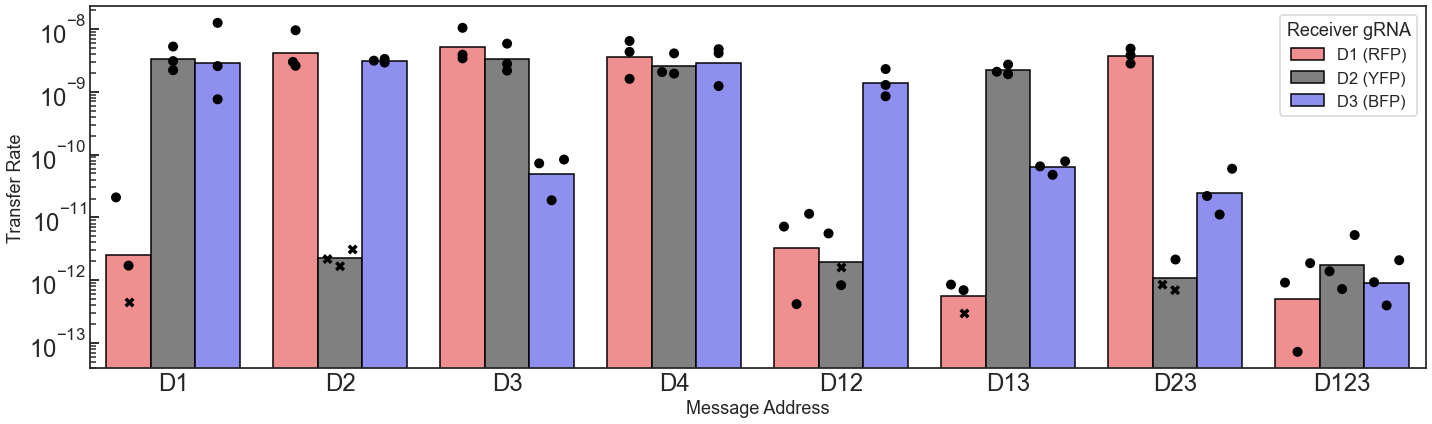

In [4]:
fig, ax = plt.subplots(1,1, figsize=(20,6))

sns.barplot(data=rate_df, x='Message Address', y='Geomean Transfer Rate',
            hue='Receiver gRNA', palette=[alpha_red, alpha_black, alpha_blue],
            errcolor='k', edgecolor='k', ci=None,
            order=['D1','D2','D3','D4','D12','D13','D23','D123'],
            hue_order = ['D1 (RFP)', 'D2 (YFP)', 'D3 (BFP)'],
            ax=ax,)
sns.swarmplot(data=rate_df[rate_df['LOD Hit?'] == False], x='Message Address', y='Transfer Rate',
            hue='Receiver gRNA', palette=['k'], edgecolor='k', s=10, dodge=True,
            order=['D1','D2','D3','D4','D12','D13','D23','D123'],
            hue_order = ['D1 (RFP)', 'D2 (YFP)', 'D3 (BFP)'],
            ax=ax,)
sns.swarmplot(data=rate_df[rate_df['LOD Hit?'] == True], x='Message Address', y='Transfer Rate',
            hue='Receiver gRNA', palette=['k'], edgecolor='k', s=10, dodge=True, marker='X',
            order=['D1','D2','D3','D4','D12','D13','D23','D123'],
            hue_order = ['D1 (RFP)', 'D2 (YFP)', 'D3 (BFP)'],
            ax=ax)
plt.gca().set_yscale('log')

handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[6:], labels[6:], title='Receiver gRNA')

plt.tight_layout()
plt.savefig('./figs/Fig_S2.pdf', bbox_inches='tight')
plt.show()

### Plot geometric mean transfer rate as heatmap

In [5]:
# make a heatmap
gmean_matrix = np.empty((len(receiver_types), len(sender_sites)))

sender_sites_hm = ['D123','D23','D13','D12','D1','D2','D3','D4']
sender_sites_hm_label = ['D1D2D3', 'D2D3', 'D1D3', 'D1D2',
                         'D1','D2','D3','D4']

for i in range(len(receiver_types)):
    label_row = []
    for j in range(len(sender_sites_hm)):
        gmean_rate = rate_df[(rate_df['Message Address']==sender_sites_hm[j]) &
                             (rate_df['Receiver gRNA']==receiver_types[i]) &
                             (rate_df['Replicate']==3)]['Geomean Transfer Rate'].values
        assert len(gmean_rate)==1
        gmean_rate = gmean_rate[0]
        gmean_matrix[i,j] = gmean_rate
        
    
# Hard-coded matrix of programmed transfers
ideal_matrix = np.array([[0, 1, 0, 0, 0, 1, 1, 1],
                         [0, 0, 1, 0, 1, 0, 1, 1],
                         [0, 0, 0, 1, 1, 1, 0, 1],])

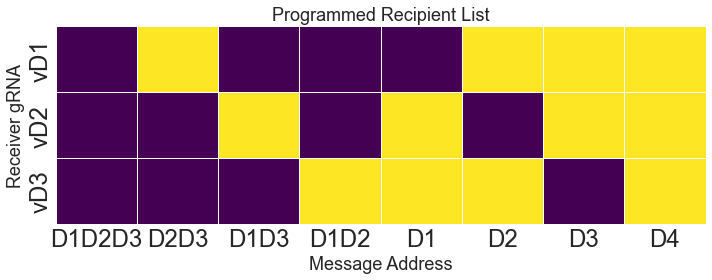

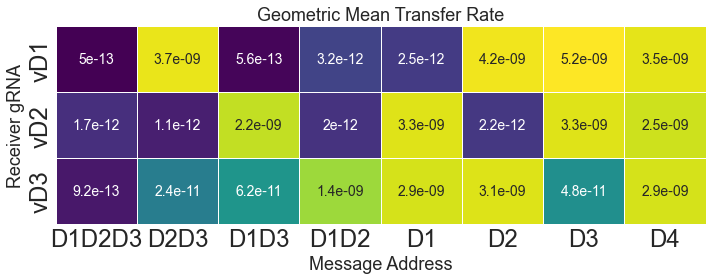

In [6]:
plt.figure(figsize=(10,4))
ax = sns.heatmap(ideal_matrix, cmap='viridis', cbar=None, linewidths=.5)
ax.set_title('Programmed Recipient List')
ax.set_ylabel('Receiver gRNA')
ax.set_xlabel('Message Address')

ax.set_yticklabels(['vD1', 'vD2', 'vD3'])
ax.set_xticklabels(sender_sites_hm_label)

plt.tight_layout()
plt.savefig('./figs/Fig_4A.pdf', bbox_inches='tight')
plt.show()

plt.figure(figsize=(10,4))
ax = sns.heatmap(gmean_matrix, cmap='viridis', 
                 norm=LogNorm(),
                 cbar=None,
                 linewidths=.5, annot=True,
                 annot_kws={'fontsize':14},)
ax.set_title('Geometric Mean Transfer Rate')
ax.set_ylabel('Receiver gRNA')
ax.set_xlabel('Message Address')

ax.set_yticklabels(['vD1', 'vD2', 'vD3'])
ax.set_xticklabels(sender_sites_hm_label)

plt.tight_layout()
plt.savefig('./figs/Fig_4B.pdf', bbox_inches='tight')

plt.show()

### Calculate all fold changes between valid and invalid conditions

With the exception of the D1D2D3 and D4 message plasmids, each message has at least one valid recipient and at least one invalid recipient. The following analysis calculates all the fold changes in the geometric mean of the transfer rate between the valid and invalid recipients for each message plasmid.

In [11]:
sender_sites_fc = ['D23','D13','D12','D1','D2','D3']
valid_receivers_fc = [['D1 (RFP)'], ['D2 (YFP)'], ['D3 (BFP)'],
                      ['D2 (YFP)', 'D3 (BFP)'],
                      ['D1 (RFP)', 'D3 (BFP)'],
                      ['D1 (RFP)', 'D2 (YFP)'],
                     ]
invalid_receivers_fc = [
                      ['D2 (YFP)', 'D3 (BFP)'],
                      ['D1 (RFP)', 'D3 (BFP)'],
                      ['D1 (RFP)', 'D2 (YFP)'],
    ['D1 (RFP)'], ['D2 (YFP)'], ['D3 (BFP)'],
]

rate_fc_df = pd.DataFrame()

for s in range(len(sender_sites_fc)):
    valid_receivers_ls = valid_receivers_fc[s]
    invalid_receivers_ls = invalid_receivers_fc[s]
    for rv in range(len(valid_receivers_ls)):
        for ri in range(len(invalid_receivers_ls)):
            gmean_rate_v = rate_df[(rate_df['Message Address']==sender_sites_fc[s]) &
                                   (rate_df['Receiver gRNA']==valid_receivers_ls[rv]) &
                                   (rate_df['Replicate']==3)]['Geomean Transfer Rate'].values
            gmean_rate_i = rate_df[(rate_df['Message Address']==sender_sites_fc[s]) &
                                   (rate_df['Receiver gRNA']==invalid_receivers_ls[ri]) &
                                   (rate_df['Replicate']==3)]['Geomean Transfer Rate'].values
            assert len(gmean_rate_v) == 1
            assert len(gmean_rate_i) == 1
            rate_fc = gmean_rate_v[0]/gmean_rate_i[0]
        
            temprow = pd.DataFrame({'Message Address': sender_sites_fc[s],
                                    'Valid Receiver': valid_receivers_ls[rv],
                                    'Invalid Receiver': invalid_receivers_ls[ri],
                                    'Fold Change Transfer Rate': rate_fc}, index=[0])
            
            rate_fc_df = pd.concat([rate_fc_df, temprow])

rate_fc_df

,Message Address,Valid Receiver,Invalid Receiver,Fold Change Transfer Rate
0,D23,D1 (RFP),D2 (YFP),3431.278554
0,D23,D1 (RFP),D3 (BFP),153.361601
0,D13,D2 (YFP),D1 (RFP),3936.783974
0,D13,D2 (YFP),D3 (BFP),35.419805
0,D12,D3 (BFP),D1 (RFP),419.213539
0,D12,D3 (BFP),D2 (YFP),689.902129
0,D1,D2 (YFP),D1 (RFP),1308.683028
0,D1,D3 (BFP),D1 (RFP),1152.295353
0,D2,D1 (RFP),D2 (YFP),1875.145668
0,D2,D3 (BFP),D2 (YFP),1395.371620


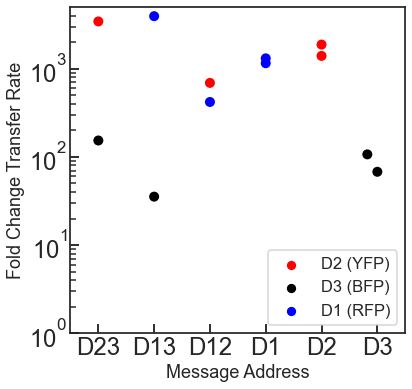

In [13]:
plt.figure(figsize=(6,6))
sns.swarmplot(data=rate_fc_df, x='Message Address',
              y='Fold Change Transfer Rate',
              hue='Invalid Receiver',
              s=10,)
plt.gca().set_yscale('log')
ymin, ymax = plt.gca().get_ylim()
plt.gca().set_ylim((1, ymax))
plt.legend(loc='lower right')
plt.show()

In [12]:
# calculate average (geometric mean) fold change for a given receiver gRNA across all messages

d3_gRNA_gmean_fc = stats.mstats.gmean(rate_fc_df[rate_fc_df['Invalid Receiver'] == 'D3 (BFP)']['Fold Change Transfer Rate'].values)
d2_gRNA_gmean_fc = stats.mstats.gmean(rate_fc_df[rate_fc_df['Invalid Receiver'] == 'D2 (YFP)']['Fold Change Transfer Rate'].values)
d1_gRNA_gmean_fc = stats.mstats.gmean(rate_fc_df[rate_fc_df['Invalid Receiver'] == 'D1 (RFP)']['Fold Change Transfer Rate'].values)

print(f'The average fold change for the D3 gRNA was {d3_gRNA_gmean_fc}.')
print(f'The average fold change for the D2 gRNA was {d2_gRNA_gmean_fc}.')
print(f'The average fold change for the D1 gRNA was {d1_gRNA_gmean_fc}.')

The average fold change for the D3 gRNA was 79.17794772708777.
The average fold change for the D2 gRNA was 1577.5825341747875.
The average fold change for the D1 gRNA was 1256.0120074876831.
